# Stock Market Prediction of NiftyIT companies using Machine Learning Techniques

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv("NiftyIT.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,06/28/2024,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,0.09%
1,06/27/2024,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,2.03%
2,06/26/2024,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,-0.06%
3,06/25/2024,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,0.81%
4,06/24/2024,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,-0.16%
...,...,...,...,...,...,...,...
4076,01/07/2008,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,-2.86%
4077,01/04/2008,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,-0.53%
4078,01/03/2008,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,-2.24%
4079,01/02/2008,"4,722.50","4,747.40","4,765.15","4,659.40",8.14M,-0.54%


In [18]:
data.shape

(4081, 7)

In [19]:
data=data.drop(columns=['Date'])
data

,Price,Open,High,Low,Vol.,Change %
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,0.09%
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,2.03%
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,-0.06%
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,0.81%
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,-0.16%
...,...,...,...,...,...,...
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,-2.86%
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,-0.53%
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,-2.24%
4079,"4,722.50","4,747.40","4,765.15","4,659.40",8.14M,-0.54%


In [20]:
data.describe()

,Price,Open,High,Low,Vol.,Change %
count,4081,4081,4081,4081,4072,4081
unique,4053,4053,4045,4044,2813,744
top,"10,929.90","11,096.40","7,380.10","11,093.60",15.26M,0.17%
freq,2,2,2,2,6,24


In [21]:
data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        9
Change %    0
dtype: int64

In [22]:
df=data.dropna()
df

,Price,Open,High,Low,Vol.,Change %
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,0.09%
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,2.03%
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,-0.06%
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,0.81%
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,-0.16%
...,...,...,...,...,...,...
4075,"4,506.35","4,473.95","4,522.45","4,437.65",10.00M,1.02%
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,-2.86%
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,-0.53%
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,-2.24%


In [23]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4072 entries, 0 to 4079
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     4072 non-null   object
 1   Open      4072 non-null   object
 2   High      4072 non-null   object
 3   Low       4072 non-null   object
 4   Vol.      4072 non-null   object
 5   Change %  4072 non-null   object
dtypes: object(6)
memory usage: 222.7+ KB


In [25]:
df.drop(columns=['Change %'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\1658844372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Change %'],inplace=True)


,Price,Open,High,Low,Vol.
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M
...,...,...,...,...,...
4075,"4,506.35","4,473.95","4,522.45","4,437.65",10.00M
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M


In [26]:
df.sample(10)

,Price,Open,High,Low,Vol.
3940,"3,682.80","3,816.15","3,816.15","3,609.55",17.45M
1465,"14,663.90","14,768.85","14,768.90","14,620.95",22.27K
4002,"4,165.60","4,127.60","4,189.50","4,126.40",16.03M
1327,"15,861.65","15,992.45","16,002.20","15,828.85",25.02K
3062,"6,461.15","6,447.65","6,492.65","6,408.50",13.89M
3497,"5,606.45","5,618.10","5,639.65","5,554.00",11.71M
366,"28,677.80","28,912.60","28,925.45","28,600.75",17.30M
3857,"2,364.50","2,316.60","2,373.65","2,281.60",13.04M
2759,"6,224.70","6,211.80","6,267.45","6,208.30",9.43M
3970,"4,300.70","4,260.10","4,317.20","4,186.45",7.83M


In [27]:
def convert_vol(vol):
    if 'K' in vol:
        return float(vol.replace('K', ''))
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1000
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1000000
    else:
        return float(vol)/1000

def convert_to_num(dt):
    if ',' in dt:
        return float(dt.replace(',',''))
    else:
        return float(dt)

In [28]:
df['Volume(K)']=df['Vol.'].apply(convert_vol)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\3236443624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume(K)']=df['Vol.'].apply(convert_vol)


,Price,Open,High,Low,Vol.,Volume(K)
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,29240.0
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,54770.0
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,18200.0
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,15980.0
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,18070.0
...,...,...,...,...,...,...
4075,"4,506.35","4,473.95","4,522.45","4,437.65",10.00M,10000.0
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,11260.0
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,9170.0
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,12940.0


In [29]:
df['Price']=df['Price'].apply(convert_to_num)
df['Open']=df['Open'].apply(convert_to_num)
df['High']=df['High'].apply(convert_to_num)
df['Low']=df['Low'].apply(convert_to_num)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\1879019303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\1879019303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open']=df['Open'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\1879019303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Price,Open,High,Low,Vol.,Volume(K)
0,36157.50,36154.20,36334.65,36041.20,29.24M,29240.0
1,36123.70,35289.25,36191.20,35105.70,54.77M,54770.0
2,35406.60,35484.05,35593.95,35336.00,18.20M,18200.0
3,35426.90,35146.65,35468.00,35004.85,15.98M,15980.0
4,35143.80,35067.75,35282.00,34918.15,18.07M,18070.0
...,...,...,...,...,...,...
4075,4506.35,4473.95,4522.45,4437.65,10.00M,10000.0
4076,4460.95,4580.05,4580.05,4453.55,11.26M,11260.0
4077,4592.50,4616.35,4654.25,4581.45,9.17M,9170.0
4078,4616.85,4679.90,4704.60,4602.45,12.94M,12940.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4072 entries, 0 to 4079
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      4072 non-null   float64
 1   Open       4072 non-null   float64
 2   High       4072 non-null   float64
 3   Low        4072 non-null   float64
 4   Vol.       4072 non-null   object 
 5   Volume(K)  4072 non-null   float64
dtypes: float64(5), object(1)
memory usage: 222.7+ KB


In [31]:
df.drop(columns=['Vol.'], inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\1067798956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Vol.'], inplace=True)


,Price,Open,High,Low,Volume(K)
0,36157.50,36154.20,36334.65,36041.20,29240.0
1,36123.70,35289.25,36191.20,35105.70,54770.0
2,35406.60,35484.05,35593.95,35336.00,18200.0
3,35426.90,35146.65,35468.00,35004.85,15980.0
4,35143.80,35067.75,35282.00,34918.15,18070.0
...,...,...,...,...,...
4075,4506.35,4473.95,4522.45,4437.65,10000.0
4076,4460.95,4580.05,4580.05,4453.55,11260.0
4077,4592.50,4616.35,4654.25,4581.45,9170.0
4078,4616.85,4679.90,4704.60,4602.45,12940.0


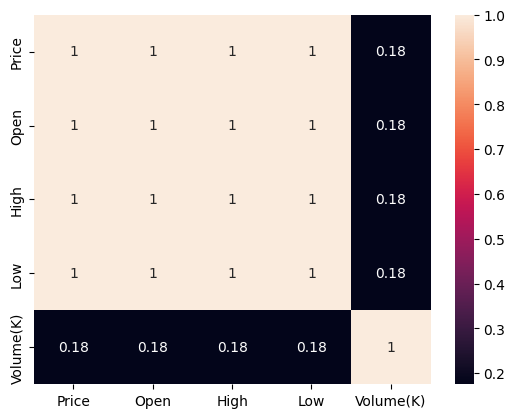

In [32]:
sns.heatmap(df.corr(),annot=True)
plt.show()

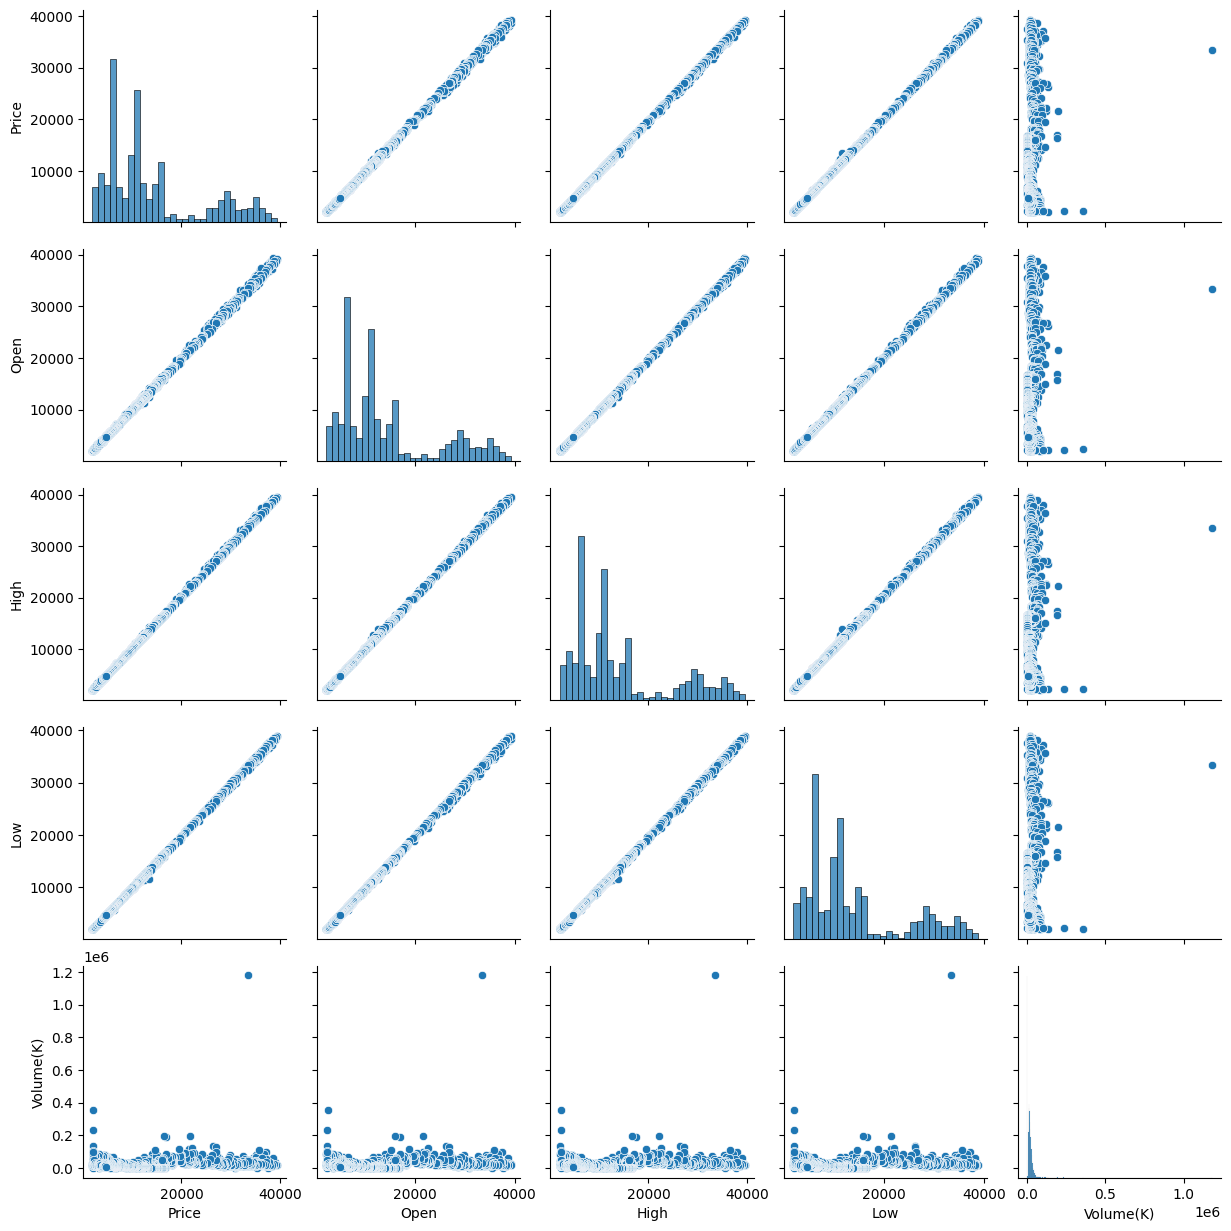

In [33]:
sns.pairplot(df,kind='scatter')
plt.show()

## Simple Linear Regression

## Taking Open as independent feature and close as dependent fearture

<function matplotlib.pyplot.show(close=None, block=None)>

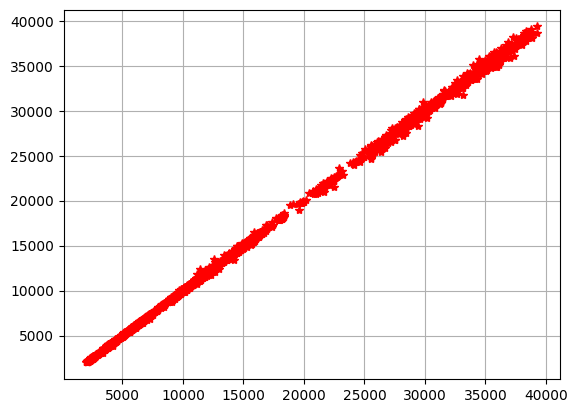

In [34]:
plt.plot(df['Open'],df['Price'],'r*')
plt.grid(True)
plt.show

In [35]:
X=df[['Open']]
X

,Open
0,36154.20
1,35289.25
2,35484.05
3,35146.65
4,35067.75
...,...
4075,4473.95
4076,4580.05
4077,4616.35
4078,4679.90


In [36]:
y=df['Price']
y

0       36157.50
1       36123.70
2       35406.60
3       35426.90
4       35143.80
          ...   
4075     4506.35
4076     4460.95
4077     4592.50
4078     4616.85
4079     4722.50
Name: Price, Length: 4072, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
print(f"Coefficient : {lr.coef_}\nintercept : {lr.intercept_}")

Coefficient : [0.99926624]
intercept : 7.044077204140194


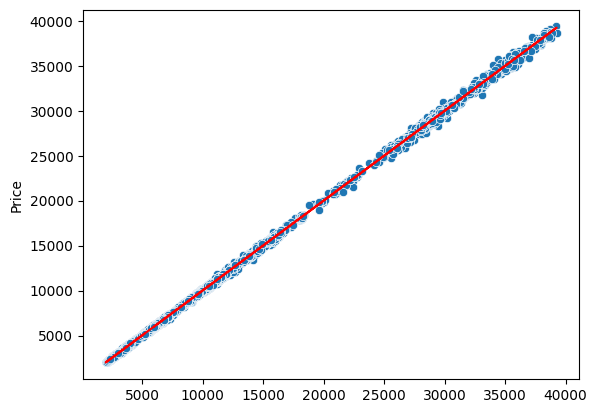

In [41]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),color='red')
plt.show()

In [42]:
pred=lr.predict(X_test)

In [43]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [44]:
import math
def find_RMSE(pred,actual):
    return math.sqrt(mean_squared_error(actual,pred))

def find_adj_r2(pred,actual):
    return 1-((1-r2_score(pred,actual))*(len(actual)-1)/(len(actual)-X_train.shape[1]-1))

In [45]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 123.99407309074262
MSE : 41028.776720497495
RMSE : 202.55561389528924
R2 : 0.9995826059736499
Adj R2 : 0.9995830049692005


In [46]:
lr_mae=mean_absolute_error(y_test,pred)
lr_rmse=find_RMSE(pred,y_test)
lr_r2=r2_score(y_test,pred)

In [47]:
dt={
    'Simple_LinearReg' : [mean_absolute_error(y_test,pred)]}
mean_abs_err=pd.DataFrame(dt)
mean_abs_err

,Simple_LinearReg
0,123.994073


In [48]:
dt={
    'Simple_LinearReg' : [find_RMSE(pred,y_test)]
}
root_mean_sq_err=pd.DataFrame(dt)
root_mean_sq_err

,Simple_LinearReg
0,202.555614


In [49]:
dt={
    'Simple_LinearReg' : [r2_score(y_test,pred)]
}
R2_score=pd.DataFrame(dt)
R2_score

,Simple_LinearReg
0,0.999583


## Ridge Regression

In [50]:
from sklearn.linear_model import Ridge

In [51]:
rr=Ridge(alpha=0.1)

In [52]:
rr.fit(X_train,y_train)

Ridge(alpha=0.1)

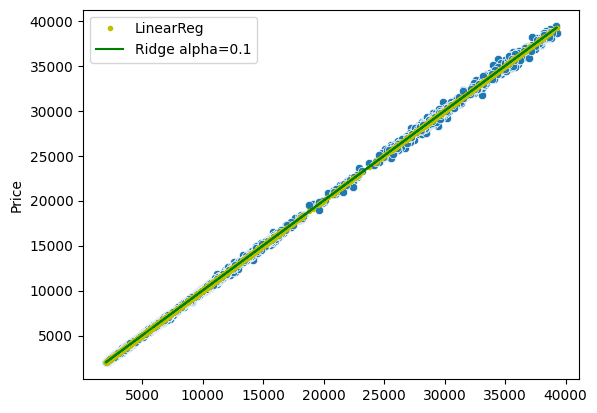

In [53]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'y.',label='LinearReg')
plt.plot(X_val,rr.predict(X_train),color='green',label='Ridge alpha=0.1')
plt.legend()
plt.show()

In [54]:
print(rr.coef_,rr.intercept_)

[0.99926624] 7.044077208620365


In [55]:
y_pred=rr.predict(X_test)

In [56]:
print(f"MAE : {mean_absolute_error(y_test,y_pred)}\nMSE : {mean_squared_error(y_test,y_pred)}\nRMSE : {find_RMSE(y_pred,y_test)}\nR2 : {r2_score(y_test,y_pred)}\nAdj R2 : {find_adj_r2(y_pred,y_test)}")

MAE : 123.99407309074319
MSE : 41028.776720409696
RMSE : 202.55561389507253
R2 : 0.9995826059736508
Adj R2 : 0.9995830049692012


In [57]:
rr_mae=mean_absolute_error(y_test,y_pred)
rr_rmse=find_RMSE(y_pred,y_test)
rr_r2=r2_score(y_test,y_pred)

In [58]:
mean_abs_err['Ridge_alpha_0.1']=[mean_absolute_error(y_test,y_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1
0,123.994073,123.994073


In [59]:
root_mean_sq_err['Ridge_alpha_0.1']=[find_RMSE(y_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1
0,202.555614,202.555614


In [60]:
R2_score['Ridge_alpha_0.1']=[r2_score(y_test,y_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1
0,0.999583,0.999583


## Lasso Regression

In [61]:
from sklearn.linear_model import Lasso

In [62]:
lsr=Lasso(alpha=0.1)

In [63]:
lsr.fit(X_train,y_train)

Lasso(alpha=0.1)

In [64]:
print(lsr.coef_,lsr.intercept_)

[0.99926624] 7.04409176957779


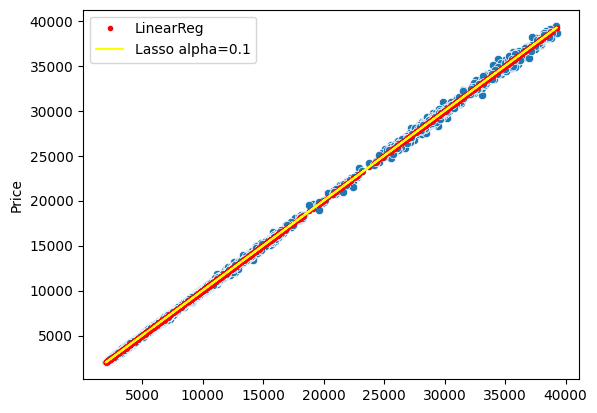

In [65]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'r.',label='LinearReg')
plt.plot(X_val,lsr.predict(X_train),color='yellow',label='Lasso alpha=0.1')
plt.legend()
plt.show()

In [66]:
yl_pred=lsr.predict(X_test)

In [67]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 123.99407309246548
MSE : 41028.77643479625
RMSE : 202.55561319004775
R2 : 0.9995826059765565
Adj R2 : 0.9995830049712339


In [68]:
lsr_mae=mean_absolute_error(y_test,yl_pred)
lsr_rmse=find_RMSE(yl_pred,y_test)
lsr_r2=r2_score(y_test,yl_pred)

In [69]:
mean_abs_err['Lasso_alpha_0.1']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,123.994073,123.994073,123.994073


In [70]:
root_mean_sq_err['Lasso_alpha_0.1']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,202.555614,202.555614,202.555613


In [71]:
R2_score['Lasso_alpha_0.1']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,0.999583,0.999583,0.999583


## Polynomial Regression

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
poly=PolynomialFeatures(degree=4)

In [74]:
X_poly = poly.fit_transform(X_train)
X_test1=poly.transform(X_test)
poly.fit(X_poly,y_train)
lin=LinearRegression()
lin.fit(X_poly,y_train)

LinearRegression()

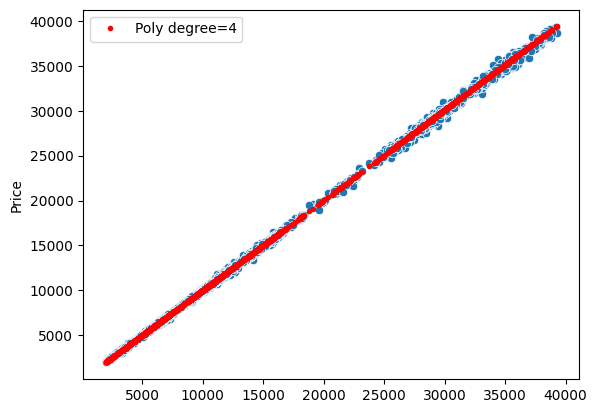

In [75]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'r.',label='Poly degree=4')
plt.legend()
plt.show()

In [76]:
yp_pred=lin.predict(X_test1)

In [77]:
print(f"MAE : {mean_absolute_error(y_test,yp_pred)}\nMSE : {mean_squared_error(y_test,yp_pred)}\nRMSE : {find_RMSE(yp_pred,y_test)}\nR2 : {r2_score(y_test,yp_pred)}\nAdj R2 : {find_adj_r2(yp_pred,y_test)}")

MAE : 129.94496180887552
MSE : 45724.198224116306
RMSE : 213.83217303323724
R2 : 0.9995348385030242
Adj R2 : 0.9995401731742694


In [78]:
poly_mae=mean_absolute_error(y_test,yp_pred)
poly_rmse=find_RMSE(yp_pred,y_test)
poly_r2=r2_score(y_test,yp_pred)

In [79]:
mean_abs_err['Poly_deg_4']=[mean_absolute_error(y_test,yp_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,123.994073,123.994073,123.994073,129.944962


In [80]:
root_mean_sq_err['Poly_deg_4']=[find_RMSE(yp_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,202.555614,202.555614,202.555613,213.832173


In [81]:
R2_score['Poly_deg_4']=r2_score(y_test,yp_pred)
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,0.999583,0.999583,0.999583,0.999535


## Ridge on Polynomial Regression

In [82]:
ridp=Ridge(alpha=0.1)
ridp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.38004e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

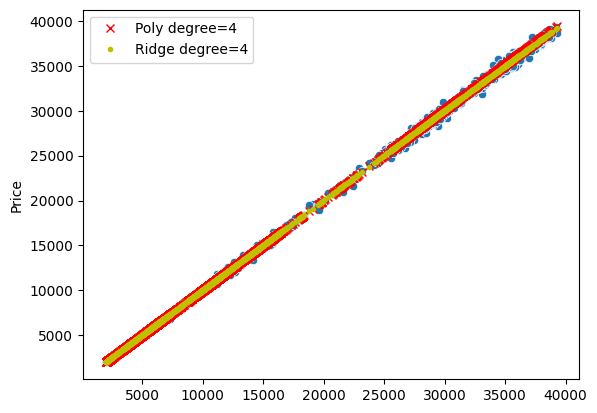

In [83]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'rx',label='Poly degree=4')
plt.plot(X_val,ridp.predict(X_poly),'y.',label='Ridge degree=4')
plt.legend()
plt.show()

In [84]:
yr_pred=ridp.predict(X_test1)

In [85]:
print(f"MAE : {mean_absolute_error(y_test,yr_pred)}\nMSE : {mean_squared_error(y_test,yr_pred)}\nRMSE : {find_RMSE(yr_pred,y_test)}\nR2 : {r2_score(y_test,yr_pred)}\nAdj R2 : {find_adj_r2(yr_pred,y_test)}")

MAE : 123.92924121530316
MSE : 40806.37628368755
RMSE : 202.00588180468296
R2 : 0.9995848684981803
Adj R2 : 0.9995853928087538


In [86]:
prr_mae=mean_absolute_error(y_test,yr_pred)
prr_rmse=find_RMSE(yr_pred,y_test)
prr_r2=r2_score(y_test,yr_pred)

In [87]:
mean_abs_err['Ridge_0.1_Poly_4']=[mean_absolute_error(y_test,yr_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,123.994073,123.994073,123.994073,129.944962,123.929241


In [88]:
root_mean_sq_err['Ridge_0.1_Poly_4']=[find_RMSE(yr_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,202.555614,202.555614,202.555613,213.832173,202.005882


In [89]:
R2_score['Ridge_0.1_Poly_4']=[r2_score(y_test,yr_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,0.999583,0.999583,0.999583,0.999535,0.999585


## Lasso on polynomial of degree 4

In [90]:
lsp=Lasso(alpha=0.1)
lsp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.482e+07, tolerance: 3.119e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

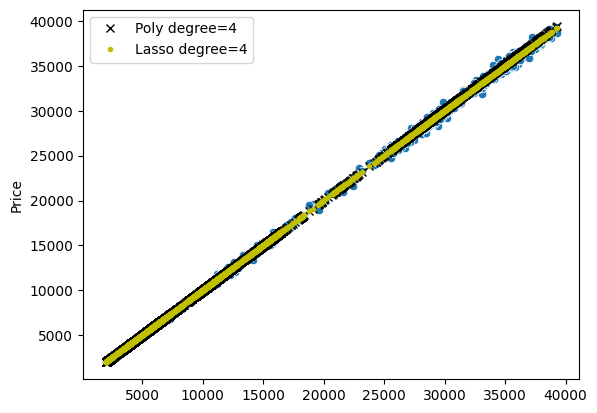

In [91]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'kx',label='Poly degree=4')
plt.plot(X_val,lsp.predict(X_poly),'y.',label='Lasso degree=4')
plt.legend()
plt.show()

In [92]:
yl_pred=lsp.predict(X_test1)

In [93]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 123.83474892527701
MSE : 40892.61910894752
RMSE : 202.219235259526
R2 : 0.9995839911325127
Adj R2 : 0.999584464996767


In [94]:
plsr_mae=mean_absolute_error(y_test,yl_pred)
plsr_rmse=find_RMSE(yl_pred,y_test)
plsr_r2=r2_score(y_test,yl_pred)

In [95]:
mean_abs_err['Lasso_0.1_Poly_4']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,123.994073,123.994073,123.994073,129.944962,123.929241,123.834749


In [96]:
root_mean_sq_err['Lasso_0.1_Poly_4']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,202.555614,202.555614,202.555613,213.832173,202.005882,202.219235


In [97]:
R2_score['Lasso_0.1_Poly_4']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,0.999583,0.999583,0.999583,0.999535,0.999585,0.999584


## Multiple Linear Regression

In [98]:
df

,Price,Open,High,Low,Volume(K)
0,36157.50,36154.20,36334.65,36041.20,29240.0
1,36123.70,35289.25,36191.20,35105.70,54770.0
2,35406.60,35484.05,35593.95,35336.00,18200.0
3,35426.90,35146.65,35468.00,35004.85,15980.0
4,35143.80,35067.75,35282.00,34918.15,18070.0
...,...,...,...,...,...
4075,4506.35,4473.95,4522.45,4437.65,10000.0
4076,4460.95,4580.05,4580.05,4453.55,11260.0
4077,4592.50,4616.35,4654.25,4581.45,9170.0
4078,4616.85,4679.90,4704.60,4602.45,12940.0


In [99]:
df.drop(columns=['High','Low'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\4086614560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['High','Low'],inplace=True)


,Price,Open,Volume(K)
0,36157.50,36154.20,29240.0
1,36123.70,35289.25,54770.0
2,35406.60,35484.05,18200.0
3,35426.90,35146.65,15980.0
4,35143.80,35067.75,18070.0
...,...,...,...
4075,4506.35,4473.95,10000.0
4076,4460.95,4580.05,11260.0
4077,4592.50,4616.35,9170.0
4078,4616.85,4679.90,12940.0


In [100]:
X=df.drop(columns=['Price'])
X

,Open,Volume(K)
0,36154.20,29240.0
1,35289.25,54770.0
2,35484.05,18200.0
3,35146.65,15980.0
4,35067.75,18070.0
...,...,...
4075,4473.95,10000.0
4076,4580.05,11260.0
4077,4616.35,9170.0
4078,4679.90,12940.0


In [101]:
y=df['Price']
y

0       36157.50
1       36123.70
2       35406.60
3       35426.90
4       35143.80
          ...   
4075     4506.35
4076     4460.95
4077     4592.50
4078     4616.85
4079     4722.50
Name: Price, Length: 4072, dtype: float64

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [103]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [104]:
cdf=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf

,coef_lin
Open,0.999128
Volume(K),0.000294


In [105]:
mlin.intercept_

3.7607779332156497

In [106]:
pred=mlin.predict(X_test)

In [107]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 124.26349142483319
MSE : 41049.745005486715
RMSE : 202.60736661209216
R2 : 0.9995823926590548
Adj R2 : 0.9995822576194328


In [108]:
mlr_mae=mean_absolute_error(y_test,pred)
mlr_rmse=find_RMSE(pred,y_test)
mlr_r2=r2_score(y_test,pred)

In [109]:
mean_abs_err['Mul_LinearReg']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,123.994073,123.994073,123.994073,129.944962,123.929241,123.834749,124.263491


In [110]:
root_mean_sq_err['Mul_LinearReg'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,202.555614,202.555614,202.555613,213.832173,202.005882,202.219235,202.607367


In [111]:
R2_score['Mul_LinearReg']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,0.999583,0.999583,0.999583,0.999535,0.999585,0.999584,0.999582


## Applying Ridge Regression on Multiple Linear Regression

In [112]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [113]:
cdf['coef_ridge']=ridm.coef_
cdf

,coef_lin,coef_ridge
Open,0.999128,0.999128
Volume(K),0.000294,0.000294


In [114]:
ridm.intercept_

3.760777937446619

In [115]:
pred=ridm.predict(X_test)

In [116]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 124.26349142483741
MSE : 41049.74500540445
RMSE : 202.60736661188915
R2 : 0.9995823926590556
Adj R2 : 0.9995822576194333


In [117]:
mrr_mae=mean_absolute_error(y_test,pred)
mrr_rmse=find_RMSE(pred,y_test)
mrr_r2=r2_score(y_test,pred)

In [118]:
mean_abs_err['Mul_Ridge_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,123.994073,123.994073,123.994073,129.944962,123.929241,123.834749,124.263491,124.263491


In [119]:
root_mean_sq_err['Mul_Ridge_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,202.555614,202.555614,202.555613,213.832173,202.005882,202.219235,202.607367,202.607367


In [120]:
R2_score['Mul_Ridge_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,0.999583,0.999583,0.999583,0.999535,0.999585,0.999584,0.999582,0.999582


## Applying Lasso Regression on Multiple Linear Regression

In [121]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [122]:
cdf['coef_lasso']=lso.coef_
cdf

,coef_lin,coef_ridge,coef_lasso
Open,0.999128,0.999128,0.999128
Volume(K),0.000294,0.000294,0.000294


In [123]:
lso.intercept_

3.7607435531408555

In [124]:
pred=lso.predict(X_test)

In [125]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 124.26349120100075
MSE : 41049.74567744478
RMSE : 202.60736827036862
R2 : 0.9995823926522188
Adj R2 : 0.9995822576148948


In [126]:
mlsr_mae=mean_absolute_error(y_test,pred)
mlsr_rmse=find_RMSE(pred,y_test)
mlsr_r2=r2_score(y_test,pred)

In [127]:
mean_abs_err['Mul_Lasso_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,123.994073,123.994073,123.994073,129.944962,123.929241,123.834749,124.263491,124.263491,124.263491


In [128]:
root_mean_sq_err['Mul_Lasso_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,202.555614,202.555614,202.555613,213.832173,202.005882,202.219235,202.607367,202.607367,202.607368


In [129]:
R2_score['Mul_Lasso_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,0.999583,0.999583,0.999583,0.999535,0.999585,0.999584,0.999582,0.999582,0.999582


## Adding more features

In [130]:
df

,Price,Open,Volume(K)
0,36157.50,36154.20,29240.0
1,36123.70,35289.25,54770.0
2,35406.60,35484.05,18200.0
3,35426.90,35146.65,15980.0
4,35143.80,35067.75,18070.0
...,...,...,...
4075,4506.35,4473.95,10000.0
4076,4460.95,4580.05,11260.0
4077,4592.50,4616.35,9170.0
4078,4616.85,4679.90,12940.0


In [131]:
df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\2831065476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\2831065476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg
0,36157.50,36154.20,29240.0,35485.035714
1,36123.70,35289.25,54770.0,35485.035714
2,35406.60,35484.05,18200.0,35485.035714
3,35426.90,35146.65,15980.0,35485.035714
4,35143.80,35067.75,18070.0,35485.035714
...,...,...,...,...
4075,4506.35,4473.95,10000.0,4358.407143
4076,4460.95,4580.05,11260.0,4399.500000
4077,4592.50,4616.35,9170.0,4456.228571
4078,4616.85,4679.90,12940.0,4506.042857


In [132]:
df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\1927853552.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\1927853552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg,14DaysMavg
0,36157.50,36154.20,29240.0,35485.035714,35087.932143
1,36123.70,35289.25,54770.0,35485.035714,35087.932143
2,35406.60,35484.05,18200.0,35485.035714,35087.932143
3,35426.90,35146.65,15980.0,35485.035714,35087.932143
4,35143.80,35067.75,18070.0,35485.035714,35087.932143
...,...,...,...,...,...
4075,4506.35,4473.95,10000.0,4358.407143,4115.260714
4076,4460.95,4580.05,11260.0,4399.500000,4151.889286
4077,4592.50,4616.35,9170.0,4456.228571,4213.778571
4078,4616.85,4679.90,12940.0,4506.042857,4270.710714


In [133]:
delta=df['Price'].diff()
gain=delta.where(delta>0,0)
loss=delta.where(delta<0,0)
avg_gain=gain.rolling(window=14).mean()
avg_loss=loss.rolling(window=14).mean()
rs=avg_gain/avg_loss
df['RSI']=100-(100/(1+rs))
df['RSI'].fillna(method='bfill',inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\3173424381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI']=100-(100/(1+rs))
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_22840\3173424381.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RSI']

,Price,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,36157.50,36154.20,29240.0,35485.035714,35087.932143,-23.313410
1,36123.70,35289.25,54770.0,35485.035714,35087.932143,-23.313410
2,35406.60,35484.05,18200.0,35485.035714,35087.932143,-23.313410
3,35426.90,35146.65,15980.0,35485.035714,35087.932143,-23.313410
4,35143.80,35067.75,18070.0,35485.035714,35087.932143,-23.313410
...,...,...,...,...,...,...
4075,4506.35,4473.95,10000.0,4358.407143,4115.260714,162.096088
4076,4460.95,4580.05,11260.0,4399.500000,4151.889286,194.296022
4077,4592.50,4616.35,9170.0,4456.228571,4213.778571,130.174851
4078,4616.85,4679.90,12940.0,4506.042857,4270.710714,132.802208


<Axes: >

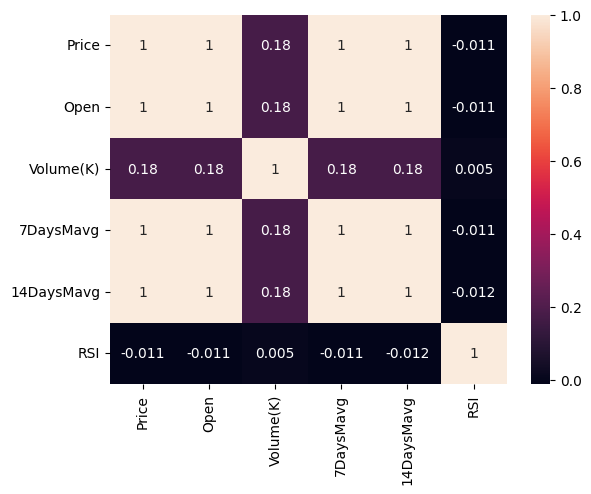

In [134]:
sns.heatmap(df.corr(),annot=True)

In [135]:
X=df.drop(columns='Price')
X

,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,36154.20,29240.0,35485.035714,35087.932143,-23.313410
1,35289.25,54770.0,35485.035714,35087.932143,-23.313410
2,35484.05,18200.0,35485.035714,35087.932143,-23.313410
3,35146.65,15980.0,35485.035714,35087.932143,-23.313410
4,35067.75,18070.0,35485.035714,35087.932143,-23.313410
...,...,...,...,...,...
4075,4473.95,10000.0,4358.407143,4115.260714,162.096088
4076,4580.05,11260.0,4399.500000,4151.889286,194.296022
4077,4616.35,9170.0,4456.228571,4213.778571,130.174851
4078,4679.90,12940.0,4506.042857,4270.710714,132.802208


In [136]:
y=df['Price']
y

0       36157.50
1       36123.70
2       35406.60
3       35426.90
4       35143.80
          ...   
4075     4506.35
4076     4460.95
4077     4592.50
4078     4616.85
4079     4722.50
Name: Price, Length: 4072, dtype: float64

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [139]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [140]:
cdf1=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf1

,coef_lin
Open,0.704205
Volume(K),0.000100
7DaysMavg,0.439185
14DaysMavg,-0.143974
RSI,-0.000122


In [141]:
mlin.intercept_

1.8414372361694404

In [142]:
pred=mlin.predict(X_test)

In [143]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 110.28613478029841
MSE : 31453.78364163758
RMSE : 177.35214586138386
R2 : 0.9996800143107467
Adj R2 : 0.9996787561956844


In [144]:
mean_abs_err['Mul_LinearReg+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,123.994073,123.994073,123.994073,129.944962,123.929241,123.834749,124.263491,124.263491,124.263491,110.286135


In [145]:
root_mean_sq_err['Mul_LinearReg+'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,202.555614,202.555614,202.555613,213.832173,202.005882,202.219235,202.607367,202.607367,202.607368,177.352146


In [146]:
R2_score['Mul_LinearReg+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,0.999583,0.999583,0.999583,0.999535,0.999585,0.999584,0.999582,0.999582,0.999582,0.99968


## Ridge

In [147]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [148]:
cdf1['coef_ridge']=ridm.coef_
cdf1

,coef_lin,coef_ridge
Open,0.704205,0.704205
Volume(K),0.000100,0.000100
7DaysMavg,0.439185,0.439185
14DaysMavg,-0.143974,-0.143974
RSI,-0.000122,-0.000122


In [149]:
ridm.intercept_

1.8414372337520035

In [150]:
pred=ridm.predict(X_test)

In [151]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 110.28613478028342
MSE : 31453.7836421146
RMSE : 177.35214586272872
R2 : 0.9996800143107418
Adj R2 : 0.999678756195679


In [152]:
mean_abs_err['Mul_Ridge_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,123.994073,123.994073,123.994073,129.944962,123.929241,123.834749,124.263491,124.263491,124.263491,110.286135,110.286135


In [153]:
root_mean_sq_err['Mul_Ridge_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,202.555614,202.555614,202.555613,213.832173,202.005882,202.219235,202.607367,202.607367,202.607368,177.352146,177.352146


In [154]:
R2_score['Mul_Ridge_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,0.999583,0.999583,0.999583,0.999535,0.999585,0.999584,0.999582,0.999582,0.999582,0.99968,0.99968


## Lasso

In [155]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.123e+07, tolerance: 3.119e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [156]:
cdf1['coef_lasso']=lso.coef_
cdf1

,coef_lin,coef_ridge,coef_lasso
Open,0.704205,0.704205,0.819331
Volume(K),0.000100,0.000100,0.000176
7DaysMavg,0.439185,0.439185,0.208653
14DaysMavg,-0.143974,-0.143974,-0.028639
RSI,-0.000122,-0.000122,-0.000091


In [157]:
lso.intercept_

0.3528807890943426

In [158]:
pred=lso.predict(X_test)

In [159]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 112.75597771778766
MSE : 33090.20103589687
RMSE : 181.90712200432634
R2 : 0.9996633667063194
Adj R2 : 0.9996620301453166


In [160]:
mean_abs_err['Mul_Lasso_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,123.994073,123.994073,123.994073,129.944962,123.929241,123.834749,124.263491,124.263491,124.263491,110.286135,110.286135,112.755978


In [161]:
root_mean_sq_err['Mul_Lasso_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,202.555614,202.555614,202.555613,213.832173,202.005882,202.219235,202.607367,202.607367,202.607368,177.352146,177.352146,181.907122


In [162]:
R2_score['Mul_Lasso_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,0.999583,0.999583,0.999583,0.999535,0.999585,0.999584,0.999582,0.999582,0.999582,0.99968,0.99968,0.999663
